In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
## collab user
# !pip install neuron
# !pip install netpyne
# !git clone https://github.com/suny-downstate-medical-center/S1_netpyne.git
# import os
# os.chdir('S1_netpyne/info')

In [3]:
import matplotlib
import os
os.chdir('../sim')

In [4]:
!nrnivmodl mod/

/home/fernando/S1_netpyne/sim
Mod files: "mod/cadad.mod" "mod/CaDynamics_E2.mod" "mod/Ca_HVA.mod" "mod/Ca_LVAst.mod" "mod/Ca.mod" "mod/DetAMPANMDA.mod" "mod/DetGABAAB.mod" "mod/HH2.mod" "mod/htc.mod" "mod/Ih.mod" "mod/Im.mod" "mod/IT2.mod" "mod/IT.mod" "mod/KdShu2007.mod" "mod/kl.mod" "mod/K_Pst.mod" "mod/K_Tst.mod" "mod/MyExp2SynBB.mod" "mod/MyExp2SynNMDABB.mod" "mod/Nap_Et2.mod" "mod/NaTa_t.mod" "mod/NaTs2_t.mod" "mod/ProbAMPANMDA_EMS.mod" "mod/ProbGABAAB_EMS.mod" "mod/SK_E2.mod" "mod/SKv3_1.mod" "mod/StochKv_deterministic.mod" "mod/StochKv.mod" "mod/tia.mod" "mod/vecevent.mod"

COBJS=''
 -> Compiling mod_func.c
gcc -O2   -I.   -I/home/fernando/anaconda3/envs/p37/lib/python3.7/site-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
 => LINKING shared library ./libnrnmech.so
g++ -O2 -DVERSION_INFO='8.0.0' -std=c++11 -shared -fPIC  -I /home/fernando/anaconda3/envs/p37/lib/python3.7/site-packages/neuron/.data/include -o ./libnrnmech.so -Wl,-sona

In [5]:
"""
cfg.py 

Simulation configuration for S1 model (using NetPyNE)
This file has sim configs as well as specification for parameterized values in netParams.py 

Contributors: salvadordura@gmail.com, fernandodasilvaborges@gmail.com
"""

from netpyne import specs, sim
import pickle, json
import numpy as np

%matplotlib inline

cfg = specs.SimConfig()  

#------------------------------------------------------------------------------
#
# SIMULATION CONFIGURATION
#
#------------------------------------------------------------------------------

#------------------------------------------------------------------------------
# Run parameters
#------------------------------------------------------------------------------
cfg.duration = 2.0*1e2 ## Duration of the sim, in ms  
cfg.dt = 0.025
cfg.seeds = {'conn': 4321, 'stim': 4321, 'loc': 4321} 
cfg.hParams = {'celsius': 34, 'v_init': -65}  
cfg.verbose = True
cfg.createNEURONObj = True
cfg.createPyStruct = True  
cfg.cvode_active = False
cfg.cvode_atol = 1e-6
cfg.cache_efficient = True
cfg.printRunTime = 0.1

cfg.includeParamsLabel = False
cfg.printPopAvgRates = True

cfg.checkErrors = False

cfg.poptypeNumber = 55
cfg.celltypeNumber = 207

In [6]:
#------------------------------------------------------------------------------  
# S1 Cells
# Load 55 Morphological Names and Cell pop numbers -> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names used to import the cells from 'cell_data/' -> L1:14 L23:43 L4:46 L5:52 L6:52
# Create [Morphological,Electrical] = number of cell metype in the sub-pop
with open('../info/anatomy/S1-cells-distributions-Rat.txt') as mtype_file:
	mtype_content = mtype_file.read()       

cfg.popNumber = {}
cfg.cellNumber = {} 
cfg.popLabel = {} 
popParam = []
cellParam = []
cfg.meParamLabels = {} 
cfg.popLabelEl = {} 
for line in mtype_content.split('\n')[:-1]:
	metype, mtype, etype, n, m = line.split()
	cfg.cellNumber[metype] = int(n)
	cfg.popLabel[metype] = mtype
	cfg.popNumber[mtype] = int(m)

	if mtype not in popParam:
		popParam.append(mtype)
		cfg.popLabelEl[mtype] = [] 
               
	cfg.popLabelEl[mtype].append(metype)
	cellParam.append(metype)

cfg.S1pops = popParam[0:55]
cfg.S1cells = cellParam[0:207]

#------------------------------------------------------------------------------  
cfg.popParamLabels = popParam[0:cfg.poptypeNumber] # to debug
cfg.cellParamLabels = cellParam[0:cfg.celltypeNumber] # to debug

In [7]:
#------------------------------------------------------------------------------
# Cells
#------------------------------------------------------------------------------

# TO DEBUG - import and simulate only the Cell soma (to study only the Net)
cfg.reducedtest = False    

# TO DEBUG - Create only 5 Cells for each MEtype in S1
cfg.oneCellperMEtypeS1 = False 

In [8]:
#------------------------------------------------------------------------------  
# TO DEBUG - Create only one Cell per MEtype in S1 cells
if cfg.oneCellperMEtypeS1:
	cfg.popNumber = {}
	cfg.cellNumber = {} 
	for mtype in cfg.S1pops:
		cfg.popNumber[mtype] = 0

	for line in mtype_content.split('\n')[:-1]:
		metype, mtype, etype, n, m = line.split()
		if int(n) < 5:
			cfg.cellNumber[metype] = int(n)
			cfg.popNumber[mtype] = cfg.popNumber[mtype] + int(n)
		else:
			cfg.cellNumber[metype] = 5
			cfg.popNumber[mtype] = cfg.popNumber[mtype] + 5


In [9]:
# testpop = ['L4_SS', 'L5_STPC', 'L5_UTPC', 'L23_LBC', 'L23_MC', 'L4_LBC', 'L4_MC', 'L5_LBC', 'L5_MC']
# Nsyn=513042, N=2684

In [10]:
# Epops = ['L23_PC', 'L4_PC', 'L4_SS', 'L4_SP', 
#              'L5_TTPC1', 'L5_TTPC2', 'L5_STPC', 'L5_UTPC',
#              'L6_TPC_L1', 'L6_TPC_L4', 'L6_BPC', 'L6_IPC', 'L6_UTPC']
# Ipops = []
# for popName in cfg.S1pops:
#     if popName not in Epops:
#         Ipops.append(popName)

# Epops = []
# for popName in cfg.S1pops:
#     if popName not in Ipops:
#         Epops.append(popName)   

In [11]:
# subPopLabels = [] # 
# popNumberLabel = 0 
# for mtype in cfg.S1pops[28:42]:
#     if cfg.popNumber[mtype] < 400:
#         popNumberLabel += cfg.popNumber[mtype] 
#         subPopLabels.append(mtype)
#         print(mtype,cfg.popNumber[mtype])
        
# popNumberLabel

In [12]:
subPopLabels = ['L4_LBC', 'L5_STPC'] # 
#------------------------------------------------------------------------------  
cfg.S1pops = subPopLabels
cfg.S1cells = []
for metype in cfg.cellParamLabels:
    if cfg.popLabel[metype] in subPopLabels:        
        cfg.S1cells.append(metype)
        
cfg.thalamicpops = []

cfg.popParamLabels = cfg.S1pops
cfg.cellParamLabels = cfg.S1cells

In [13]:
cellsID = {} 
for mtype in cfg.S1pops:
    for metype in cfg.popLabelEl[mtype]:
        cellNumberLabel = 0    
        print(metype,cfg.cellNumber[metype],cfg.popLabel[metype],cfg.popNumber[cfg.popLabel[metype]])    
        cellsID[metype] = [ids for ids in range(cellNumberLabel,cellNumberLabel+cfg.cellNumber[metype])]
        cellNumberLabel += cfg.cellNumber[metype]   

L4_LBC_cACint209 22 L4_LBC 122
L4_LBC_cNAC187 14 L4_LBC 122
L4_LBC_cSTUT189 31 L4_LBC 122
L4_LBC_dNAC222 46 L4_LBC 122
L4_LBC_dSTUT214 9 L4_LBC 122
L5_STPC_cADpyr232 302 L5_STPC 302


In [14]:
#--------------------------------------------------------------------------
# Recording 
#--------------------------------------------------------------------------
cfg.allpops = cfg.popParamLabels
cfg.cellsrec = 0
if cfg.cellsrec == 0:  cfg.recordCells = cfg.allpops # record all cells
elif cfg.cellsrec == 1: cfg.recordCells = [(pop,0) for pop in cfg.allpops] # record one cell of each pop
elif cfg.cellsrec == 2: # record one cell of each cellMEtype (cfg.celldiversity = True)
	cfg.recordCells = []
	cellNumberLabel = 0 
	for metype in cfg.cellParamLabels:
		if metype in cfg.cellParamLabels:
			if cfg.cellNumber[metype] < 5:
				for numberME in range(cfg.cellNumber[metype]):
					cfg.recordCells.append((cfg.popLabel[metype],cellNumberLabel+numberME))
			else:
				for numberME in range(0,cfg.cellNumber[metype],int(cfg.cellNumber[metype]/4.5)):
					cfg.recordCells.append((cfg.popLabel[metype],cellNumberLabel+numberME))
			cellNumberLabel = cellNumberLabel + cfg.cellNumber[metype]
			if cellNumberLabel == cfg.popNumber[cfg.popLabel[metype]]:
				cellNumberLabel = 0 
                
cfg.recordTraces = {'V_soma': {'sec':'soma', 'loc':0.5, 'var':'v'}}  ## Dict with traces to record
cfg.recordStim = False			
cfg.recordTime = False  		
cfg.recordStep = 0.1    

In [15]:
#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.simLabel = 'subNets_test0'
cfg.saveFolder = '../info/test/'+cfg.simLabel
# cfg.filename =                	## Set file output name
cfg.savePickle = False         	## Save pkl file
cfg.saveJson = True	           	## Save json file
cfg.saveDataInclude = ['simConfig','simData', 'netParams', 'net'] ## , 'netParams', 'simConfig', 
cfg.backupCfgFile = None 		##  
cfg.gatherOnlySimData = False	##  
cfg.saveCellSecs = True			
cfg.saveCellConns = True	

In [16]:
"""
netParams.py
"""
# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

netParams.scale = 1.0 # Scale factor for number of cells
netParams.sizeX = 420.0 # x-dimension (horizontal length) size in um
netParams.sizeY = 2082.0 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 420.0 # z-dimension (horizontal depth) size in um
netParams.shape = 'cylinder' # cylindrical (column-like) volume

# r = 210 um and hexagonal side length = 230.9 um

In [17]:
#------------------------------------------------------------------------------
# General network parameters
#------------------------------------------------------------------------------
# Layer	height (um)	height (norma)	from	to
# L1	165		    0.079		    0.000	0.079
# L2	149		    0.072		    0.079	0.151
# L3	353		    0.170		    0.151	0.320
# L4	190		    0.091		    0.320	0.412
# L5	525		    0.252		    0.412	0.664
# L6	700		    0.336		    0.664	1.000
# L23	502		    0.241		    0.079	0.320
# All	2082	    1.000	


cellModels = ['HH_full']
Epops = ['L23_PC', 'L4_PC', 'L4_SS', 'L4_SP', 
             'L5_TTPC1', 'L5_TTPC2', 'L5_STPC', 'L5_UTPC',
             'L6_TPC_L1', 'L6_TPC_L4', 'L6_BPC', 'L6_IPC', 'L6_UTPC']
Ipops = []
for popName in cfg.S1pops:
    if popName not in Epops:
        Ipops.append(popName)

Epops = []
for popName in cfg.S1pops:
    if popName not in Ipops:
        Epops.append(popName)   

layer = {'1':[0.0, 0.079], '2': [0.079,0.151], '3': [0.151,0.320], '23': [0.079,0.320], '4':[0.320,0.412], '5': [0.412,0.664], '6': [0.664,1.0], 
'longS1': [2.2,2.3], 'longS2': [2.3,2.4]}  # normalized layer boundaries


In [18]:
#------------------------------------------------------------------------------
# General connectivity parameters
#------------------------------------------------------------------------------
netParams.defaultThreshold = -10.0 # spike threshold, 10 mV is NetCon default, lower it for all cells
netParams.defaultDelay = 0.1 # default conn delay (ms)(M1: 2.0 ms)
netParams.propVelocity = 300.0 #  300 μm/ms (Stuart et al., 1997)(M1: 500.0um/ms)
# netParams.scaleConnWeight = 0.001 # weight conversion factor (from nS to uS)
netParams.scaleConnWeightNetStims = 0.001  # weight conversion factor (from nS to uS)

In [19]:
#------------------------------------------------------------------------------
# Population parameters
#------------------------------------------------------------------------------
## S1
cfg.scaleDensity = 1.0

for popName in cfg.S1pops:
	layernumber = popName[1:2]
	if layernumber == '2':
		netParams.popParams[popName] = {'cellType': popName, 'cellModel': 'HH_full', 'ynormRange': layer['23'], 
                                        'numCells': int(np.ceil(cfg.scaleDensity*cfg.popNumber[popName])), 'diversity': True}
	else:
		netParams.popParams[popName] = {'cellType': popName, 'cellModel': 'HH_full', 'ynormRange': layer[layernumber], 
                                        'numCells': int(np.ceil(cfg.scaleDensity*cfg.popNumber[popName])), 'diversity': True}

In [20]:
## S1 cell property rules
for cellName in cfg.S1cells:
    
    if cfg.cellNumber[cellName] < 5:
        morphoNumbers = cfg.cellNumber[cellName]
    else:
        morphoNumbers = 5
    
    popName = cfg.popLabel[cellName]
    cellFraction = 1.0*cfg.cellNumber[cellName]/(morphoNumbers*cfg.popNumber[popName])
    
    for morphoNumber in range(morphoNumbers):
        cellMe = cellName + '_' + str(morphoNumber+1)
        ## Load cell rules previously saved using netpyne format
        netParams.loadCellParamsRule(label = cellMe, fileName = 'cell_data/' + cellMe + '/' + cellMe + '_cellParams.pkl')    
        netParams.renameCellParamsSec(label = cellMe, oldSec = 'soma_0', newSec = 'soma')

        cellRule = {'conds': {'cellType': popName}, 'diversityFraction': cellFraction, 'secs': {}}  # cell rule dict
        cellRule['secs'] = netParams.cellParams[cellMe]['secs']     
        cellRule['conds'] = netParams.cellParams[cellMe]['conds']    
        cellRule['conds']['cellType'] = popName
        cellRule['globals'] = netParams.cellParams[cellMe]['globals']       
        cellRule['secLists'] = netParams.cellParams[cellMe]['secLists']                 
        cellRule['secLists']['all'][0] = 'soma' # replace 'soma_0'
        cellRule['secLists']['somatic'][0]  = 'soma' # replace 'soma_0'
                              
        cellRule['secLists']['spiny'] = {}
        cellRule['secLists']['spinyEE'] = {}
        cellRule['secLists'][cellMe] = {}

        nonSpiny = ['axon_0', 'axon_1']
        cellRule['secLists']['spiny'] = [sec for sec in cellRule['secLists']['all'] if sec not in nonSpiny]
        nonSpinyEE = ['axon_0', 'axon_1', 'soma']
        cellRule['secLists']['spinyEE'] = [sec for sec in cellRule['secLists']['all'] if sec not in nonSpinyEE]

        #-----------------------------------------------------------------------------------#
        if cfg.reducedtest:
            cellRule['secs'] = {}
            cellRule['secs']['soma'] = netParams.cellParams[cellMe]['secs']['soma']
            cellRule['secLists']['spiny'] = ['soma']
            cellRule['secLists']['spinyEE'] = ['soma']
            cellRule['secLists']['all'] = ['soma']
            cellRule['secLists']['basal'] = ['soma']    
        #-----------------------------------------------------------------------------------#
        netParams.cellParams[cellMe] = cellRule   # add dict to list of cell params   

In [21]:
#------------------------------------------------------------------------------
# Synaptic mechanism parameters  - mods from M1 detailed
#------------------------------------------------------------------------------
## S1
netParams.synMechParams['AMPA'] = {'mod':'MyExp2SynBB', 'tau1': 0.2, 'tau2': 1.74, 'e': 0}
netParams.synMechParams['NMDA'] = {'mod': 'MyExp2SynNMDABB', 'tau1NMDA': 0.29, 'tau2NMDA': 43, 'e': 0}
netParams.synMechParams['GABAA6'] = {'mod':'MyExp2SynBB', 'tau1': 0.2, 'tau2': 6.44, 'e': -80}
netParams.synMechParams['GABAA'] = {'mod':'MyExp2SynBB', 'tau1': 0.2, 'tau2': 8.3, 'e': -80}
netParams.synMechParams['GABAA10'] = {'mod':'MyExp2SynBB', 'tau1': 0.2, 'tau2': 10.4, 'e': -80}
netParams.synMechParams['GABAB'] = {'mod':'MyExp2SynBB', 'tau1': 3.5, 'tau2': 260.9, 'e': -93} 

ESynMech = ['AMPA', 'NMDA']
ISynMech = ['GABAA', 'GABAB']
ISynMech6 = ['GABAA6', 'GABAB']
ISynMech10 = ['GABAA10', 'GABAB']

In [22]:
#------------------------------------------------------------------------------
# load data from S1 conn pre-processing file 
#------------------------------------------------------------------------------
with open('conn/conn.pkl', 'rb') as fileObj: connData = pickle.load(fileObj)

lmat = connData['lmat']
a0mat = connData['a0mat']
d0 = connData['d0']

a0e = connData['a0mat_exp']
l0e = connData['lmat_exp']
d0e = connData['d0_exp']

a0g = connData['a0mat_gauss']
x0g = connData['x0_gauss']
l0g = connData['lmat_gauss']
d0g = connData['d0_gauss']

dfinal = connData['dfinal']
pmat = {}
pmat[12.5] = connData['pmat12um']
pmat[25] = connData['pmat25um']
pmat[50] = connData['pmat50um']
pmat[75] = connData['pmat75um']
pmat[100] = connData['pmat100um']
pmat[125] = connData['pmat125um']
pmat[150] = connData['pmat150um']
pmat[175] = connData['pmat175um']
pmat[200] = connData['pmat200um'] #max value for d0=200

synperconnNumber = connData['synperconnNumber']
connNumber = connData['connNumber']
decay = connData['decay']
gsyn = connData['gsyn']
use = connData['use']

ConnTypesNumber = connData['ConnTypesNumber'] 
ConnTypes = connData['ConnTypes']   

connIEtype = connData['connIEtype']  
connEItype = connData['connEItype']
parameters_syn = connData['parameters_syn']

In [23]:
import pandas as pd

physColumnNames = []
syntypes = []
for name,syntype in parameters_syn:    
    if name not in physColumnNames:
        physColumnNames.append(name) 
    if syntype not in syntypes:
        syntypes.append(syntype)
        
#     print(name,syntype,parameters_syn[name,syntype])
dfS6 = pd.DataFrame(index=syntypes, columns=physColumnNames)
for syntype in syntypes:
    for name in physColumnNames:    
        dfS6.loc[syntype][name] = parameters_syn[name,syntype]
dfS6

,ConnType,gsyn,gsynStd,decay,decayStd,use,useStd,dep,depStd,fac,facStd,s-types,type
0,0,0.83,0.55,10.4,6.1,0.16,0.1,45.0,21.0,376.0,253.0,I1,II
3,1,0.91,0.61,10.4,6.1,0.16,0.1,45.0,21.0,376.0,253.0,I1,IE
13,2,0.75,0.32,10.4,6.1,0.415,0.212,162.0,69.0,690.0,5.0,I1,IE
1,3,0.83,0.55,8.3,2.2,0.25,0.13,706.0,405.0,21.0,9.0,I2,II
4,4,0.91,0.61,8.3,2.2,0.25,0.13,706.0,405.0,21.0,9.0,I2,IE
8,5,0.75,0.32,8.3,2.2,0.25,0.13,706.0,405.0,21.0,9.0,I2,IE
9,6,0.75,0.32,8.3,2.2,0.3,0.08,1250.0,520.0,2.0,4.0,I2,IE
10,7,0.91,0.61,8.3,2.2,0.14,0.05,875.0,285.0,22.0,5.0,I2,IE
12,8,2.97,0.95,8.3,2.2,0.25,0.13,706.0,405.0,21.0,9.0,I2,IE
5,9,0.91,0.61,6.44,1.7,0.32,0.14,144.0,80.0,62.0,31.0,I3,IE


In [24]:
#------------------------------------------------------------------------------
# Synaptic mechanism parameters  - mods from S1 BBP - deterministic version
#------------------------------------------------------------------------------
for syntype in syntypes:
    if syntype > 50:  # Exc
        
        netParams.synMechParams['S1_EE_STP_Det_' + str(syntype)] = {'mod': 'DetAMPANMDA',
                                         'Use': dfS6['use'][syntype], # ± dfS6['useStd'][syntype]
                                         'Dep': dfS6['dep'][syntype], # ± dfS6['depStd'][syntype] 
                                         'Fac': dfS6['fac'][syntype], # ± dfS6['facStd'][syntype]
                                         'tau_d_AMPA': 1.74, # ± 0.18 ms
                                         'tau_r_AMPA': 0.2, 
                                         'tau_r_NMDA': 0.29,
                                         'tau_d_NMDA': 43,   
                                         'NMDA_ratio': 0.8, # ± 0.1 for EE -- experimentally measured for some path?
                                         'mg':1.0, #    0.5mM where exceptionally specified?                                                                
                                            }
        netParams.synMechParams['S1_EI_STP_Det_' + str(syntype)] = {'mod': 'DetAMPANMDA',
                                         'Use': dfS6['use'][syntype], # ± dfS6['useStd'][syntype]
                                         'Dep': dfS6['dep'][syntype], # ± dfS6['depStd'][syntype] 
                                         'Fac': dfS6['fac'][syntype], # ± dfS6['facStd'][syntype]
                                         'tau_d_AMPA': 1.74, # ± 0.18 ms
                                         'tau_r_AMPA': 0.2,
                                         'tau_r_NMDA': 0.29,
                                         'tau_d_NMDA': 43,   
                                         'NMDA_ratio': 0.4, # ± 0.1  for EI -- experimentally measured for some path?
                                         'mg':1.0, #    0.5mM where exceptionally specified?                                                                
                                            }
    else: # Inh
        
        netParams.synMechParams['S1_II_STP_Det_' + str(syntype)] = {'mod': 'DetGABAAB',
                                         'Use': dfS6['use'][syntype], # ± dfS6['useStd'][syntype]
                                         'Dep': dfS6['dep'][syntype], # ± dfS6['depStd'][syntype]  
                                         'Fac': dfS6['fac'][syntype], # ± dfS6['facStd'][syntype]
                                         'tau_d_GABAA': dfS6['decay'][syntype], # ± dfS6['decayStd'][syntype]
                                         'tau_r_GABAA': 0.2,   #rng.lognormal(0.2, 0.1) in synapses.hoc  
                                         'tau_d_GABAB': 260.9,
                                         'tau_r_GABAB': 3.5,
#                                          'GABAB_ratio': 1.0,  #=0(1):The ratio of GABAB to GABAA  ?          
                                            }
        
        netParams.synMechParams['S1_IE_STP_Det_' + str(syntype)] = {'mod': 'DetGABAAB',
                                         'Use': dfS6['use'][syntype], # ± dfS6['useStd'][syntype]
                                         'Dep': dfS6['dep'][syntype], # ± dfS6['depStd'][syntype]  
                                         'Fac': dfS6['fac'][syntype], # ± dfS6['facStd'][syntype]
                                         'tau_d_GABAA': dfS6['decay'][syntype], # ± dfS6['decayStd'][syntype]
                                         'tau_r_GABAA': 0.2,   #rng.lognormal(0.2, 0.1) in synapses.hoc  
                                         'tau_d_GABAB': 260.9,
                                         'tau_r_GABAB': 3.5,
#                                          'GABAB_ratio': 1.0,  #=0(1):The ratio of GABAB to GABAA   ?       
                                            }

In [25]:
#------------------------------------------------------------------------------
# S1 Local connectivity parameters 
#------------------------------------------------------------------------------
cfg.addConn = True

cfg.synWeightFractionEE = [1.0, 1.0] # E -> E AMPA to NMDA ratio
cfg.synWeightFractionEI = [1.0, 1.0] # E -> I AMPA to NMDA ratio
cfg.synWeightFractionII = [1.0, 1.0]  # I -> I GABAA to GABAB ratio
cfg.synWeightFractionIE = [1.0, 1.0]  # I -> E GABAA to GABAB ratio
cfg.EEGain = 1.0
cfg.EIGain = 1.0
cfg.IIGain = 1.0
cfg.IEGain = 1.0

if cfg.addConn:    
    for pre in Ipops+Epops:
        for post in Ipops+Epops:
            if float(connNumber[pre][post]) > 0:          
                # ------------------------------------------------------------------------------    
                #  2D distance prob rules
                # ------------------------------------------------------------------------------ 
                if int(float(d0[pre][post])) < 25:    # single fit
                    if 'exp' in connData['best_fit'][pre][post]:  # exponential            
                        prob = '%s*exp(-dist_2D/%s)*(dist_2D<%s)' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post])      
                    else: # gaussian
                        prob = '%s*exp(-(dist_2D-%s)**2/(2*%s**2))*(dist_2D<%s)' % (a0g[pre][post],x0g[pre][post],l0g[pre][post],dfinal[pre][post])   
                        
                else:
                    if 'expl' in connData['best_fit'][pre][post]:  # exponential + linear interpolation [25:d0]
                        if int(float(d0[pre][post])) == 25:    #d0==25 -> exponential fit when dist_2D>25, else prob[0um:25um] = pmat[12.5]
                            prob = '%s*exp(-dist_2D/%s)*(dist_2D<%s) if dist_2D > %s else %f' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post],d0[pre][post],float(pmat[12.5][pre][post]))
                        else:    #d0>25 -> exponential fit when dist_2D>d0, else prob[0um:d0] = linear interpolation [25:d0]
                            d01 = int(float(d0[pre][post]))
                            y1 = float(pmat[25][pre][post])
                            y2 = float(pmat[d01][pre][post])
                            x1 = 25
                            x2 = d01                   
                            angular = (y2 - y1)/(x2 - x1)
                            linear = y2 - x2*angular
                            prob = '%s*exp(-dist_2D/%s)*(dist_2D<%s) if dist_2D > %s else %f * dist_2D + %f' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post],d0[pre][post],angular,linear)
                   
                    elif 'exp' in connData['best_fit'][pre][post]:  # exponential     
                        if float(pmat[12.5][pre][post]) > float(pmat[25][pre][post]):
                            prob = '%s*exp(-dist_2D/%s)*(dist_2D<%s)' % (a0e[pre][post],l0e[pre][post],dfinal[pre][post])
                        else:  
                            prob = '%s*exp(-dist_2D/%s)*(dist_2D<%s) if dist_2D > %s else %f' % (a0e[pre][post],l0e[pre][post],dfinal[pre][post],d0e[pre][post],float(pmat[12.5][pre][post]))      
                    
                    else: # gaussian
                        prob = '%s*exp(-(dist_2D-%s)**2/(2*%s**2))*(dist_2D<%s)' % (a0g[pre][post],x0g[pre][post],l0g[pre][post],dfinal[pre][post])             
                        
                # ------------------------------------------------------------------------------    
                # I -> I
                # ------------------------------------------------------------------------------
#                 if pre in Ipops:
#                     if post in Ipops:                             
#                         connID = ConnTypes[pre][post][0]                        
#                         synMechType = 'S1_II_STP_Det_' + str(connID)   
#                         netParams.connParams['II_' + pre + '_' + post] = { 
#                                         'preConds': {'pop': pre}, 
#                                         'postConds': {'pop': post},
#                                         'synMech': synMechType,
#                                         'probability': prob,
#                                         'weight': parameters_syn['gsyn',connID] * cfg.IIGain, 
#                                         'synMechWeightFactor': cfg.synWeightFractionII,
#                                         'delay': 'defaultDelay+dist_3D/propVelocity',
#                                         'synsPerConn': int(synperconnNumber[pre][post]+0.5),
#                                         'sec': 'spiny'}        
#                 # ------------------------------------------------------------------------------
                #  I -> E  # with ME conn diversity
                # ------------------------------------------------------------------------------
                if pre in Ipops:
                    if post in Epops:                                                       
                        cellpreList_A = []
                        cellpreList_B = []
                        cellpreList_C = []
                        connID_B = -1    
                        connID_C = -1                               
                        if 'SBC' in pre or 'LBC' in pre or 'NBC' in pre:    
                            for npre,cellpre in enumerate(cfg.popLabelEl[pre]):   
                                premtype = pre[-3:]
                                
                                for preetype in connIEtype[premtype].keys():
                                    if preetype in cellpre:
                                        connID = connIEtype[premtype][preetype]    
                                        print(preetype,cellpre,connID)
                                                                 
                                if connID == ConnTypes[pre][post][0]:
                                    cellpreList_A += cellsID[cellpre]    
                                elif connID == ConnTypes[pre][post][1]:
                                    cellpreList_B += cellsID[cellpre]
                                    connID_B = ConnTypes[pre][post][1]
                                elif connID == ConnTypes[pre][post][2]:
                                    cellpreList_C += cellsID[cellpre]
                                    connID_C = ConnTypes[pre][post][2]
                                else:
                                    print('ERROR I -> E')    
                            
                            connID = ConnTypes[pre][post][0]                            
                            synMechType = 'S1_IE_STP_Det_' + str(connID)                       
                            netParams.connParams['IE_'+pre+'_'+post] = { 
                                        'preConds': {'pop': pre, 'cellList': cellpreList_A}, 
                                        'postConds': {'pop': post},
                                        'synMech': synMechType,
                                        'probability': prob,
                                        'weight': parameters_syn['gsyn',connID] * cfg.IEGain, 
                                        'synMechWeightFactor': cfg.synWeightFractionIE,
                                        'delay': 'defaultDelay+dist_3D/propVelocity',
                                        'synsPerConn': int(synperconnNumber[pre][post]+0.5),
                                        'sec': 'spiny'}  


                            if connID_B >= 0:          
                                connID = connID_B
                                synMechType = 'S1_IE_STP_Det_' + str(connID)         
                                netParams.connParams['IE_'+pre+'_'+post+'_B'] = { 
                                            'preConds': {'pop': pre, 'cellList': cellpreList_B}, 
                                            'postConds': {'pop': post},
                                            'synMech': synMechType,
                                            'probability': prob,
                                            'weight': parameters_syn['gsyn',connID] * cfg.IEGain, 
                                            'synMechWeightFactor': cfg.synWeightFractionIE,
                                            'delay': 'defaultDelay+dist_3D/propVelocity',
                                            'synsPerConn': int(synperconnNumber[pre][post]+0.5),
                                            'sec': 'spiny'}                       


                                if connID_C >= 0:          
                                    connID = connID_C
                                    synMechType = 'S1_IE_STP_Det_' + str(connID)         
                                    netParams.connParams['IE_'+pre+'_'+post+'_C'] = { 
                                                'preConds': {'pop': pre, 'cellList': cellpreList_C}, 
                                                'postConds': {'pop': post},
                                                'synMech': synMechType,
                                                'probability': prob,
                                                'weight': parameters_syn['gsyn',connID] * cfg.IEGain, 
                                                'synMechWeightFactor': cfg.synWeightFractionIE,
                                                'delay': 'defaultDelay+dist_3D/propVelocity',
                                                'synsPerConn': int(synperconnNumber[pre][post]+0.5),
                                                'sec': 'spiny'}                       
                                          
                        else:   
                            connID = ConnTypes[pre][post][0]                            
                            synMechType = 'S1_IE_STP_Det_' + str(connID)
                            
                            netParams.connParams['IE_'+pre+'_'+post] = { 
                                        'preConds': {'pop': pre}, 
                                        'postConds': {'pop': post},
                                        'synMech': synMechType,
                                        'probability': prob,
                                        'weight': parameters_syn['gsyn',connID] * cfg.IEGain, 
                                        'synMechWeightFactor': cfg.synWeightFractionIE,
                                        'delay': 'defaultDelay+dist_3D/propVelocity',
                                        'synsPerConn': int(synperconnNumber[pre][post]+0.5),
                                        'sec': 'spiny'}  
                            

                                
                #------------------------------------------------------------------------------   
                # E -> E
                #------------------------------------------------------------------------------
#                 if pre in Epops:
#                     if post in Epops:    
#                         connID = ConnTypes[pre][post][0]                        
#                         synMechType = 'S1_EE_STP_Det_' + str(connID)   
#                         netParams.connParams['EE_'+pre+'_'+post] = { 
#                             'preConds': {'pop': pre}, 
#                             'postConds': {'pop': post},
#                             'synMech': synMechType,
#                             'probability': prob, 
#                             'weight': parameters_syn['gsyn',connID] * cfg.EEGain, 
#                             'synMechWeightFactor': cfg.synWeightFractionEE,
#                             'delay': 'defaultDelay+dist_3D/propVelocity',
#                             'synsPerConn': int(synperconnNumber[pre][post]+0.5),
#                             'sec': 'spinyEE'}    
    
                #------------------------------------------------------------------------------               
                #  E -> I  with ME conn diversity
                #------------------------------------------------------------------------------   
                if pre in Epops:
                    if post in Ipops:                        
                        cellpostList_A = []
                        cellpostList_B = []
                        connID_B = -1                          
                        if ConnTypes[pre][post][0] == 131 or ConnTypes[pre][post][0] == 132: # EXCEPTIONS -> L6_IPC:L6_(DBC-LBC-NBC-SBC) and  L6_TPC_L:L6_(DBC-LBC-NBC-SBC)    
                            connID = ConnTypes[pre][post][0]      
                            synMechType = 'S1_EI_STP_Det_' + str(connID)                        
                            netParams.connParams['EI_'+pre+'_'+post] = { 
                                            'preConds': {'pop': pre}, 
                                            'postConds': {'pop': post},
                                            'synMech': synMechType,
                                            'probability': prob, 
                                            'weight': parameters_syn['gsyn',connID] * cfg.EIGain, 
                                            'synMechWeightFactor': cfg.synWeightFractionEI,
                                            'delay': 'defaultDelay+dist_3D/propVelocity',
                                            'synsPerConn': int(synperconnNumber[pre][post]+0.5),
                                            'sec': 'spiny'}   
                            
                        elif 'LBC' in post or 'NBC' in post or 'BP' in post or 'DBC' in post or 'BTC' in post:   
                            for npost,cellpost in enumerate(cfg.popLabelEl[post]):                                
                                postmtype = post[-3:]
                                if 'BP' in postmtype:
                                    postmtype = post[-2:]   
                                
                                for postetype in connEItype[postmtype].keys():
                                    if postetype in cellpost:
                                        connID = connEItype[postmtype][postetype]    
                                        print(postetype,cellpost,connID)
                                                                 
                                if connID == ConnTypes[pre][post][0]:
                                    cellpostList_A += cellsID[cellpost]    
                                elif connID == ConnTypes[pre][post][1]:
                                    cellpostList_B += cellsID[cellpost]
                                    connID_B = ConnTypes[pre][post][1]
                                else:
                                    print('ERROR E -> I')                 
                             
                            connID = ConnTypes[pre][post][0]      
                            synMechType = 'S1_EI_STP_Det_' + str(connID)                       
                            netParams.connParams['EI_'+pre+'_'+post] = { 
                                            'preConds': {'pop': pre}, 
                                            'postConds': {'pop': post, 'cellList': cellpostList_A},
                                            'synMech': synMechType,
                                            'probability': prob, 
                                            'weight': parameters_syn['gsyn',connID] * cfg.EIGain, 
                                            'synMechWeightFactor': cfg.synWeightFractionEI,
                                            'delay': 'defaultDelay+dist_3D/propVelocity',
                                            'synsPerConn': int(synperconnNumber[pre][post]+0.5),
                                            'sec': 'spiny'}   

                            if connID_B >= 0:          
                                connID = connID_B
                                synMechType = 'S1_EI_STP_Det_' + str(connID)        
                                netParams.connParams['EI_'+pre+'_'+post+'_B'] = { 
                                                'preConds': {'pop': pre}, 
                                                'postConds': {'pop':post, 'cellList': cellpostList_B},
                                                'synMech': synMechType,
                                                'probability': prob, 
                                                'weight': parameters_syn['gsyn',connID] * cfg.EIGain, 
                                                'synMechWeightFactor': cfg.synWeightFractionEI,
                                                'delay': 'defaultDelay+dist_3D/propVelocity',
                                                'synsPerConn': int(synperconnNumber[pre][post]+0.5),
                                                'sec': 'spiny'}   
                            
                                             
                        else:                           
                            connID = ConnTypes[pre][post][0]      
                            synMechType = 'S1_EI_STP_Det_' + str(connID)                        
                            netParams.connParams['EI_'+pre+'_'+post] = { 
                                            'preConds': {'pop': pre}, 
                                            'postConds': {'pop': post},
                                            'synMech': synMechType,
                                            'probability': prob, 
                                            'weight': parameters_syn['gsyn',connID] * cfg.EIGain, 
                                            'synMechWeightFactor': cfg.synWeightFractionEI,
                                            'delay': 'defaultDelay+dist_3D/propVelocity',
                                            'synsPerConn': int(synperconnNumber[pre][post]+0.5),
                                            'sec': 'spiny'}    

cAC L4_LBC_cACint209 10
cNA L4_LBC_cNAC187 5
cST L4_LBC_cSTUT189 5
dNA L4_LBC_dNAC222 10
dST L4_LBC_dSTUT214 5
cAC L4_LBC_cACint209 115
cNA L4_LBC_cNAC187 115
cST L4_LBC_cSTUT189 134
dNA L4_LBC_dNAC222 134
dST L4_LBC_dSTUT214 134


In [26]:
netParams.connParams.keys()

odict_keys(['IE_L4_LBC_L5_STPC', 'IE_L4_LBC_L5_STPC_B', 'EI_L5_STPC_L4_LBC', 'EI_L5_STPC_L4_LBC_B'])

In [27]:
# #------------------------------------------------------------------------------
# # S1 Local connectivity parameters 
# #------------------------------------------------------------------------------
# cfg.addConn = True

# cfg.synWeightFractionEE = [1.0, 1.0] # E -> E AMPA to NMDA ratio
# cfg.synWeightFractionEI = [1.0, 1.0] # E -> I AMPA to NMDA ratio
# cfg.synWeightFractionII = [1.0, 1.0]  # I -> I GABAA to GABAB ratio
# cfg.synWeightFractionIE = [1.0, 1.0]  # I -> E GABAA to GABAB ratio
# cfg.EEGain = 1.0
# cfg.EIGain = 1.0
# cfg.IIGain = 1.0
# cfg.IEGain = 1.0

# if cfg.addConn:      
# # I -> I
#     for pre in Ipops:
#         for post in Ipops:
#             if float(connNumber[pre][post]) > 0:        

#                 if int(float(d0[pre][post])) < 25:    #d0==12.5 -> single exponential fit
#                     linear = 0
#                     angular = 0
#                     prob = '%s * exp(-dist_2D/%s)*(dist_2D<%s)' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post])                     
#                 elif int(float(d0[pre][post])) == 25:    #d0==25 -> exponential fit when dist_2D>25, else prob[0um:25um] = pmat[12.5]
#                     linear = float(pmat[12.5][pre][post])
#                     angular = 0
#                     prob = '%s * exp(-dist_2D/%s)*(dist_2D<%s) if dist_2D > %s else %f * dist_2D + %f' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post],d0[pre][post],angular,linear)
#                 else:    #d0>25 -> exponential fit when dist_2D>d0, else prob[0um:d0] = linear interpolation [25:d0]
#                     d01 = int(float(d0[pre][post]))
#                     y1 = float(pmat[25][pre][post])
#                     y2 = float(pmat[d01][pre][post])
#                     x1 = 25
#                     x2 = d01                   
#                     angular = (y2 - y1)/(x2 - x1)
#                     linear = y2 - x2*angular
#                     prob = '%s * exp(-dist_2D/%s)*(dist_2D<%s) if dist_2D > %s else %f * dist_2D + %f' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post],d0[pre][post],angular,linear)
                
#                 if decay[pre][post] > 10.0:
#                     synMechType =  ISynMech10
#                 elif decay[pre][post] < 7.0:
#                     synMechType =  ISynMech6
#                 else:
#                     synMechType =  ISynMech

#                 netParams.connParams['II_'+pre+'_'+post] = { 
#                     'preConds': {'pop': pre}, 
#                     'postConds': {'pop': post},
#                     'synMech': synMechType,
#                     'probability': prob,
#                     'weight': gsyn[pre][post] * cfg.IIGain, 
#                     'synMechWeightFactor': cfg.synWeightFractionII,
#                     'delay': 'defaultDelay+dist_3D/propVelocity',
#                     'synsPerConn': int(synperconnNumber[pre][post]+0.5),
#                     'sec': 'spiny'}       

# ## I -> E
#     for pre in Ipops:
#         for post in Epops:
#             if float(connNumber[pre][post]) > 0:        

#                 if int(float(d0[pre][post])) < 25:    #d0==12.5 -> single exponential fit
#                     linear = 0
#                     angular = 0
#                     prob = '%s*exp(-dist_2D/%s)*(dist_2D<%s)' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post])                     
#                 elif int(float(d0[pre][post])) == 25:    #d0==25 -> exponential fit when dist_2D>25, else prob[0um:25um] = pmat[12.5]
#                     linear = float(pmat[12.5][pre][post])
#                     angular = 0
#                     prob = '%s*exp(-dist_2D/%s)*(dist_2D<%s) if dist_2D > %s else %f*dist_2D+%f' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post],d0[pre][post],angular,linear)
#                 else:    #d0>25 -> exponential fit when dist_2D>d0, else prob[0um:d0] = linear interpolation [25:d0]
#                     d01 = int(float(d0[pre][post]))
#                     y1 = float(pmat[25][pre][post])
#                     y2 = float(pmat[d01][pre][post])
#                     x1 = 25
#                     x2 = d01                   
#                     angular = (y2 - y1)/(x2 - x1)
#                     linear = y2 - x2*angular
#                     prob = '%s*exp(-dist_2D/%s)*(dist_2D<%s) if dist_2D > %s else %f * dist_2D + %f' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post],d0[pre][post],angular,linear)

#                 if decay[pre][post] > 10.0:
#                     synMechType =  ISynMech10
#                 elif decay[pre][post] < 7.0:
#                     synMechType =  ISynMech6
#                 else:
#                     synMechType =  ISynMech

#                 netParams.connParams['IE_'+pre+'_'+post] = { 
#                     'preConds': {'pop': pre}, 
#                     'postConds': {'pop': post},
#                     'synMech': synMechType,
#                     'probability': prob,
#                     'weight': gsyn[pre][post] * cfg.IEGain, 
#                     'synMechWeightFactor': cfg.synWeightFractionIE,
#                     'delay': 'defaultDelay+dist_3D/propVelocity',
#                     'synsPerConn': int(synperconnNumber[pre][post]+0.5),
#                     'sec': 'spiny'}     
# #------------------------------------------------------------------------------   
# ## E -> E
#     for pre in Epops:
#         for post in Epops:
#             if float(connNumber[pre][post]) > 0:        

#                 if int(float(d0[pre][post])) < 25:    #d0==12.5 -> single exponential fit
#                     linear = 0
#                     angular = 0
#                     prob = '%s * exp(-dist_2D/%s)*(dist_2D<%s)' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post])                     
#                 elif int(float(d0[pre][post])) == 25:    #d0==25 -> exponential fit when dist_2D>25, else prob[0um:25um] = pmat[12.5]
#                     linear = float(pmat[12.5][pre][post])
#                     angular = 0
#                     prob = '%s * exp(-dist_2D/%s)*(dist_2D<%s) if dist_2D > %s else %f * dist_2D + %f' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post],d0[pre][post],angular,linear)
#                 else:    #d0>25 -> exponential fit when dist_2D>d0, else prob[0um:d0] = linear interpolation [25:d0]
#                     d01 = int(float(d0[pre][post]))
#                     y1 = float(pmat[25][pre][post])
#                     y2 = float(pmat[d01][pre][post])
#                     x1 = 25
#                     x2 = d01                   
#                     angular = (y2 - y1)/(x2 - x1)
#                     linear = y2 - x2*angular
#                     prob = '%s * exp(-dist_2D/%s)*(dist_2D<%s) if dist_2D > %s else %f * dist_2D + %f' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post],d0[pre][post],angular,linear)

#                 netParams.connParams['EE_'+pre+'_'+post] = { 
#                     'preConds': {'pop': pre}, 
#                     'postConds': {'pop': post},
#                     'synMech': ESynMech,
#                     'probability': prob, 
#                     'weight': gsyn[pre][post] * cfg.EEGain, 
#                     'synMechWeightFactor': cfg.synWeightFractionEE,
#                     'delay': 'defaultDelay+dist_3D/propVelocity',
#                     'synsPerConn': int(synperconnNumber[pre][post]+0.5),
#                     'sec': 'spinyEE'}    
# # ## E -> I
#     for pre in Epops:
#         for post in Ipops:
#             if float(connNumber[pre][post]) > 0:        

#                 if int(float(d0[pre][post])) < 25:    #d0==12.5 -> single exponential fit
#                     linear = 0
#                     angular = 0
#                     prob = '%s * exp(-dist_2D/%s)*(dist_2D<%s)' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post])                     
#                 elif int(float(d0[pre][post])) == 25:    #d0==25 -> exponential fit when dist_2D>25, else prob[0um:25um] = pmat[12.5]
#                     linear = float(pmat[12.5][pre][post])
#                     angular = 0
#                     prob = '%s * exp(-dist_2D/%s)*(dist_2D<%s) if dist_2D > %s else %f * dist_2D + %f' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post],d0[pre][post],angular,linear)
#                 else:    #d0>25 -> exponential fit when dist_2D>d0, else prob[0um:d0] = linear interpolation [25:d0]
#                     d01 = int(float(d0[pre][post]))
#                     y1 = float(pmat[25][pre][post])
#                     y2 = float(pmat[d01][pre][post])
#                     x1 = 25
#                     x2 = d01                   
#                     angular = (y2 - y1)/(x2 - x1)
#                     linear = y2 - x2*angular
#                     prob = '%s * exp(-dist_2D/%s)*(dist_2D<%s) if dist_2D > %s else %f * dist_2D + %f' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post],d0[pre][post],angular,linear)

#                 netParams.connParams['EI_'+pre+'_'+post] = { 
#                     'preConds': {'pop': pre}, 
#                     'postConds': {'pop': post},
#                     'synMech': ESynMech,
#                     'probability': prob, 
#                     'weight': gsyn[pre][post] * cfg.EIGain, 
#                     'synMechWeightFactor': cfg.synWeightFractionEI,
#                     'delay': 'defaultDelay+dist_3D/propVelocity',
#                     'synsPerConn': int(synperconnNumber[pre][post]+0.5),
#                     'sec': 'spiny'}    
                   

In [28]:
for connpath in netParams.connParams.keys():
    print(connpath)
    print(netParams.connParams[connpath])
    print()

IE_L4_LBC_L5_STPC
{'preConds': {'pop': 'L4_LBC', 'cellList': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8]}, 'postConds': {'pop': 'L5_STPC'}, 'synMech': 'S1_IE_STP_Det_5', 'probability': '0.08201*exp(-(dist_2D--17.55)**2/(2*86.55**2))*(dist_2D<375)', 'weight': 0.91, 'synMechWeightFactor': [1.0, 1.0], 'delay': 'defaultDelay+dist_3D/propVelocity', 'synsPerConn': 13, 'sec': 'spiny'}

IE_L4_LBC_L5_STPC_B
{'preConds': {'pop': 'L4_LBC', 'cellList': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]}, 'postConds': {'pop': 'L5_STPC'}, 'synMech': 'S1_IE_STP_Det_10', 'probability': '0.08201*exp(-(dist_2D--17.55)**2/(2*86.55**2))*(dist_2D<375)', 'weight': 0.9

In [29]:
#------------------------------------------------------------------------------
# Spontaneous synapses + background - data from Rat
#------------------------------------------------------------------------------
cfg.addStimSynS1 = True
cfg.rateStimE = 6.0
cfg.rateStimI = 9.0

#------------------------------------------------------------------------------
# NetStim inputs to simulate Spontaneous synapses + background in S1 neurons - data from Rat
#------------------------------------------------------------------------------
SourcesNumber = 5 # for each post Mtype - sec distribution
synperNeuronStimI = connData['synperNeuronStimI']
synperNeuronStimE = connData['synperNeuronStimE']
GsynStimI = connData['GsynStimI']
GsynStimE = connData['GsynStimE']
   
if cfg.addStimSynS1:      
    for post in Ipops + Epops:

        synperNeuron = synperNeuronStimI[post]
        ratespontaneous = cfg.rateStimI
        for qSnum in range(SourcesNumber):
            ratesdifferentiation = (0.8 + 0.4*qSnum/(SourcesNumber-1)) * (synperNeuron*ratespontaneous)/SourcesNumber
            netParams.stimSourceParams['StimSynS1_S_all_INH->' + post + '_' + str(qSnum)] = {'type': 'NetStim', 'rate': ratesdifferentiation, 'noise': 1.0}

        synperNeuron = synperNeuronStimE[post]
        ratespontaneous = cfg.rateStimE
        for qSnum in range(SourcesNumber):
            ratesdifferentiation = (0.8 + 0.4*qSnum/(SourcesNumber-1)) * (synperNeuron*ratespontaneous)/SourcesNumber
            netParams.stimSourceParams['StimSynS1_S_all_EXC->' + post + '_' + str(qSnum)] = {'type': 'NetStim', 'rate': ratesdifferentiation, 'noise': 1.0}
            
    #------------------------------------------------------------------------------
    for post in Epops:
        for qSnum in range(SourcesNumber):
            netParams.stimTargetParams['StimSynS1_T_all_EXC->' + post + '_' + str(qSnum)] = {
                'source': 'StimSynS1_S_all_EXC->' + post + '_' + str(qSnum), 
                'conds': {'cellType': post}, 
                'ynorm':[0,1], 
                'sec': 'spinyEE', 
                'loc': 0.5, 
                'synMechWeightFactor': [1.0],
                'weight': GsynStimE[post],
                'delay': 0.1, 
                'synMech': 'AMPA'}

    for post in Ipops:
        for qSnum in range(SourcesNumber):
            netParams.stimTargetParams['StimSynS1_T_all_EXC->' + post + '_' + str(qSnum)] = {
                'source': 'StimSynS1_S_all_EXC->' + post + '_' + str(qSnum), 
                'conds': {'cellType': post}, 
                'ynorm':[0,1], 
                'sec': 'spiny', 
                'loc': 0.5, 
                'synMechWeightFactor': [1.0],
                'weight': GsynStimE[post],
                'delay': 0.1, 
                'synMech': 'AMPA'}

    for post in Epops+Ipops:
        for qSnum in range(SourcesNumber):
            netParams.stimTargetParams['StimSynS1_T_all_INH->' + post + '_' + str(qSnum)] = {
                'source': 'StimSynS1_S_all_INH->' + post + '_' + str(qSnum), 
                'conds': {'cellType': post}, 
                'ynorm':[0,1], 
                'sec': 'spiny', 
                'loc': 0.5, 
                'synMechWeightFactor': [1.0],
                'weight': GsynStimI[post],
                'delay': 0.1, 
                'synMech': 'GABAA'}

In [30]:
# for stimpath in netParams.stimSourceParams.keys():
#     print(stimpath)
#     print(netParams.stimSourceParams[stimpath])
#     print()    

In [31]:
# for stimpath in netParams.stimTargetParams.keys():
#     print(stimpath)
#     print(netParams.stimTargetParams[stimpath])
#     print()    

## Run small Nets in a sigle job

In [32]:
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations
sim.net.createCells()              			# instantiate network cells based on defined populations


Start time:  2021-10-16 11:48:08.098625

Creating network of 2 cell populations on 1 hosts...
Distributed population of 122 cells on 1 hosts: {0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121]}, next: 0
Cell 0/121 (gid=0) of pop L4_LBC, on node 0, 
Cell 1/121 (gid=1) of pop L4_LBC, on node 0, 
Cell 2/121 (gid=2) of pop L4_LBC, on node 0, 
Cell 3/121 (gid=3) of pop L4_LBC, on node 0, 
Cell 4/121 (gid=4) of pop L4_LBC, on node 0, 
Cell 5/121 (gid=5) of pop L4_LBC, on node 0, 
Cell 6/121 (gid=6) of pop L4_LBC, on node 0, 
Cell 7/121 (gid=7) o

Notice: compartCell_L4_LBC_HH_full_22.dend_0(0) had previously been connected to parent compartCell_L4_LBC_HH_full_22.soma(0.5)
Notice: compartCell_L4_LBC_HH_full_22.dend_1(0) had previously been connected to parent compartCell_L4_LBC_HH_full_22.dend_0(1)
Notice: compartCell_L4_LBC_HH_full_22.dend_2(0) had previously been connected to parent compartCell_L4_LBC_HH_full_22.dend_0(1)
Notice: compartCell_L4_LBC_HH_full_22.dend_3(0) had previously been connected to parent compartCell_L4_LBC_HH_full_22.dend_2(1)
Notice: compartCell_L4_LBC_HH_full_22.dend_4(0) had previously been connected to parent compartCell_L4_LBC_HH_full_22.dend_3(1)
Notice: compartCell_L4_LBC_HH_full_22.dend_5(0) had previously been connected to parent compartCell_L4_LBC_HH_full_22.dend_4(1)
Notice: compartCell_L4_LBC_HH_full_22.dend_6(0) had previously been connected to parent compartCell_L4_LBC_HH_full_22.dend_4(1)
Notice: compartCell_L4_LBC_HH_full_22.dend_7(0) had previously been connected to parent compartCell_L4_L

Cell 31/121 (gid=31) of pop L4_LBC, on node 0, 
Cell 32/121 (gid=32) of pop L4_LBC, on node 0, 
Cell 33/121 (gid=33) of pop L4_LBC, on node 0, 
Cell 34/121 (gid=34) of pop L4_LBC, on node 0, 
Cell 35/121 (gid=35) of pop L4_LBC, on node 0, 
Cell 36/121 (gid=36) of pop L4_LBC, on node 0, 
Cell 37/121 (gid=37) of pop L4_LBC, on node 0, 
Cell 38/121 (gid=38) of pop L4_LBC, on node 0, 
Cell 39/121 (gid=39) of pop L4_LBC, on node 0, 
Cell 40/121 (gid=40) of pop L4_LBC, on node 0, 
Cell 41/121 (gid=41) of pop L4_LBC, on node 0, 
Cell 42/121 (gid=42) of pop L4_LBC, on node 0, 
Cell 43/121 (gid=43) of pop L4_LBC, on node 0, 
Cell 44/121 (gid=44) of pop L4_LBC, on node 0, 
Cell 45/121 (gid=45) of pop L4_LBC, on node 0, 
Cell 46/121 (gid=46) of pop L4_LBC, on node 0, 
Cell 47/121 (gid=47) of pop L4_LBC, on node 0, 
Cell 48/121 (gid=48) of pop L4_LBC, on node 0, 


nected to parent compartCell_L4_LBC_HH_full_36.dend_13(1)
Notice: compartCell_L4_LBC_HH_full_36.dend_16(0) had previously been connected to parent compartCell_L4_LBC_HH_full_36.dend_8(1)
Notice: compartCell_L4_LBC_HH_full_36.dend_17(0) had previously been connected to parent compartCell_L4_LBC_HH_full_36.soma(0.5)
Notice: compartCell_L4_LBC_HH_full_36.dend_18(0) had previously been connected to parent compartCell_L4_LBC_HH_full_36.dend_17(1)
Notice: compartCell_L4_LBC_HH_full_36.dend_19(0) had previously been connected to parent compartCell_L4_LBC_HH_full_36.dend_17(1)
Notice: compartCell_L4_LBC_HH_full_36.dend_20(0) had previously been connected to parent compartCell_L4_LBC_HH_full_36.dend_19(1)
Notice: compartCell_L4_LBC_HH_full_36.dend_21(0) had previously been connected to parent compartCell_L4_LBC_HH_full_36.dend_19(1)
Notice: compartCell_L4_LBC_HH_full_36.dend_22(0) had previously been connected to parent compartCell_L4_LBC_HH_full_36.soma(0.5)
Notice: compartCell_L4_LBC_HH_full_

Cell 49/121 (gid=49) of pop L4_LBC, on node 0, 
Cell 50/121 (gid=50) of pop L4_LBC, on node 0, 
Cell 51/121 (gid=51) of pop L4_LBC, on node 0, 
Cell 52/121 (gid=52) of pop L4_LBC, on node 0, 
Cell 53/121 (gid=53) of pop L4_LBC, on node 0, 
Cell 54/121 (gid=54) of pop L4_LBC, on node 0, 
Cell 55/121 (gid=55) of pop L4_LBC, on node 0, 
Cell 56/121 (gid=56) of pop L4_LBC, on node 0, 
Cell 57/121 (gid=57) of pop L4_LBC, on node 0, 
Cell 58/121 (gid=58) of pop L4_LBC, on node 0, 
Cell 59/121 (gid=59) of pop L4_LBC, on node 0, 
Cell 60/121 (gid=60) of pop L4_LBC, on node 0, 
Cell 61/121 (gid=61) of pop L4_LBC, on node 0, 
Cell 62/121 (gid=62) of pop L4_LBC, on node 0, 
Cell 63/121 (gid=63) of pop L4_LBC, on node 0, 
Cell 64/121 (gid=64) of pop L4_LBC, on node 0, 
Cell 65/121 (gid=65) of pop L4_LBC, on node 0, 
Cell 66/121 (gid=66) of pop L4_LBC, on node 0, 
Cell 67/121 (gid=67) of pop L4_LBC, on node 0, 
Cell 68/121 (gid=68) of pop L4_LBC, on node 0, 
Cell 69/121 (gid=69) of pop L4_LBC, on n

Cell 64/301 (gid=186) of pop L5_STPC, on node 0, 
Cell 65/301 (gid=187) of pop L5_STPC, on node 0, 
Cell 66/301 (gid=188) of pop L5_STPC, on node 0, 
Cell 67/301 (gid=189) of pop L5_STPC, on node 0, 
Cell 68/301 (gid=190) of pop L5_STPC, on node 0, 
Cell 69/301 (gid=191) of pop L5_STPC, on node 0, 
Cell 70/301 (gid=192) of pop L5_STPC, on node 0, 
Cell 71/301 (gid=193) of pop L5_STPC, on node 0, 
Cell 72/301 (gid=194) of pop L5_STPC, on node 0, 
Cell 73/301 (gid=195) of pop L5_STPC, on node 0, 
Cell 74/301 (gid=196) of pop L5_STPC, on node 0, 
Cell 75/301 (gid=197) of pop L5_STPC, on node 0, 
Cell 76/301 (gid=198) of pop L5_STPC, on node 0, 
Cell 77/301 (gid=199) of pop L5_STPC, on node 0, 
Cell 78/301 (gid=200) of pop L5_STPC, on node 0, 
Cell 79/301 (gid=201) of pop L5_STPC, on node 0, 
Cell 80/301 (gid=202) of pop L5_STPC, on node 0, 
Cell 81/301 (gid=203) of pop L5_STPC, on node 0, 
Cell 82/301 (gid=204) of pop L5_STPC, on node 0, 
Cell 83/301 (gid=205) of pop L5_STPC, on node 0, 


Cell 231/301 (gid=353) of pop L5_STPC, on node 0, 
Cell 232/301 (gid=354) of pop L5_STPC, on node 0, 
Cell 233/301 (gid=355) of pop L5_STPC, on node 0, 
Cell 234/301 (gid=356) of pop L5_STPC, on node 0, 
Cell 235/301 (gid=357) of pop L5_STPC, on node 0, 
Cell 236/301 (gid=358) of pop L5_STPC, on node 0, 
Cell 237/301 (gid=359) of pop L5_STPC, on node 0, 
Cell 238/301 (gid=360) of pop L5_STPC, on node 0, 
Cell 239/301 (gid=361) of pop L5_STPC, on node 0, 
Cell 240/301 (gid=362) of pop L5_STPC, on node 0, 
Cell 241/301 (gid=363) of pop L5_STPC, on node 0, 
Cell 242/301 (gid=364) of pop L5_STPC, on node 0, 
Cell 243/301 (gid=365) of pop L5_STPC, on node 0, 
Cell 244/301 (gid=366) of pop L5_STPC, on node 0, 
Cell 245/301 (gid=367) of pop L5_STPC, on node 0, 
Cell 246/301 (gid=368) of pop L5_STPC, on node 0, 
Cell 247/301 (gid=369) of pop L5_STPC, on node 0, 
Cell 248/301 (gid=370) of pop L5_STPC, on node 0, 
Cell 249/301 (gid=371) of pop L5_STPC, on node 0, 
Cell 250/301 (gid=372) of pop L

[compartCell_L4_LBC_HH_full_0,
 compartCell_L4_LBC_HH_full_1,
 compartCell_L4_LBC_HH_full_2,
 compartCell_L4_LBC_HH_full_3,
 compartCell_L4_LBC_HH_full_4,
 compartCell_L4_LBC_HH_full_5,
 compartCell_L4_LBC_HH_full_6,
 compartCell_L4_LBC_HH_full_7,
 compartCell_L4_LBC_HH_full_8,
 compartCell_L4_LBC_HH_full_9,
 compartCell_L4_LBC_HH_full_10,
 compartCell_L4_LBC_HH_full_11,
 compartCell_L4_LBC_HH_full_12,
 compartCell_L4_LBC_HH_full_13,
 compartCell_L4_LBC_HH_full_14,
 compartCell_L4_LBC_HH_full_15,
 compartCell_L4_LBC_HH_full_16,
 compartCell_L4_LBC_HH_full_17,
 compartCell_L4_LBC_HH_full_18,
 compartCell_L4_LBC_HH_full_19,
 compartCell_L4_LBC_HH_full_20,
 compartCell_L4_LBC_HH_full_21,
 compartCell_L4_LBC_HH_full_22,
 compartCell_L4_LBC_HH_full_23,
 compartCell_L4_LBC_HH_full_24,
 compartCell_L4_LBC_HH_full_25,
 compartCell_L4_LBC_HH_full_26,
 compartCell_L4_LBC_HH_full_27,
 compartCell_L4_LBC_HH_full_28,
 compartCell_L4_LBC_HH_full_29,
 compartCell_L4_LBC_HH_full_30,
 compartCell_L4_LB

In [33]:
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
# sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)
# sim.runSim()                      			# run parallel Neuron simulation  
sim.gatherData()                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()  

Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Created StimSynS1_S_all_EXC->L5_STPC_0 NetStim for cell gid=122
  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_0 NetStim, postGid=122, sec=apic_81, loc=0.5, synMech=AMPA, weight=0.0007217, delay=0.10
  Created StimSynS1_S_all_EXC->L5_STPC_0 NetStim for cell gid=123
  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_0 NetStim, postGid=123, sec=apic_2, loc=0.5, synMech=AMPA, weight=0.0007217, delay=0.10
  Created StimSynS1_S_all_EXC->L5_STPC_0 NetStim for cell gid=124
  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_0 NetStim, postGid=124, sec=dend_8, loc=0.5, synMech=AMPA, weight=0.0007217, delay=0.10
  Created StimSynS1_S_all_EXC->L5_STPC_0 NetStim for cell gid=125
  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_0 NetStim, postGid=125, sec=apic_62, loc=0.5, synMech=AMPA, weight=0.0007217, delay=0.10
  Created StimSynS1_S_all_EXC->L5_STPC_

  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_0 NetStim, postGid=419, sec=apic_51, loc=0.5, synMech=AMPA, weight=0.0007217, delay=0.10
  Created StimSynS1_S_all_EXC->L5_STPC_0 NetStim for cell gid=420
  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_0 NetStim, postGid=420, sec=apic_66, loc=0.5, synMech=AMPA, weight=0.0007217, delay=0.10
  Created StimSynS1_S_all_EXC->L5_STPC_0 NetStim for cell gid=421
  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_0 NetStim, postGid=421, sec=dend_4, loc=0.5, synMech=AMPA, weight=0.0007217, delay=0.10
  Created StimSynS1_S_all_EXC->L5_STPC_0 NetStim for cell gid=422
  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_0 NetStim, postGid=422, sec=apic_68, loc=0.5, synMech=AMPA, weight=0.0007217, delay=0.10
  Created StimSynS1_S_all_EXC->L5_STPC_0 NetStim for cell gid=423
  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_0 NetStim, postGid=423, sec=apic_22, loc=0.5, synMech=AMPA, weight=0.0007217, delay=0.10
  Creat

  Created StimSynS1_S_all_EXC->L5_STPC_2 NetStim for cell gid=167
  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_2 NetStim, postGid=167, sec=apic_33, loc=0.5, synMech=AMPA, weight=0.0007217, delay=0.10
  Created StimSynS1_S_all_EXC->L5_STPC_2 NetStim for cell gid=168
  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_2 NetStim, postGid=168, sec=apic_103, loc=0.5, synMech=AMPA, weight=0.0007217, delay=0.10
  Created StimSynS1_S_all_EXC->L5_STPC_2 NetStim for cell gid=169
  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_2 NetStim, postGid=169, sec=apic_64, loc=0.5, synMech=AMPA, weight=0.0007217, delay=0.10
  Created StimSynS1_S_all_EXC->L5_STPC_2 NetStim for cell gid=170
  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_2 NetStim, postGid=170, sec=apic_111, loc=0.5, synMech=AMPA, weight=0.0007217, delay=0.10
  Created StimSynS1_S_all_EXC->L5_STPC_2 NetStim for cell gid=171
  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_2 NetStim, postGid=171, sec

  Created StimSynS1_S_all_EXC->L5_STPC_3 NetStim for cell gid=154
  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_3 NetStim, postGid=154, sec=apic_2, loc=0.5, synMech=AMPA, weight=0.0007217, delay=0.10
  Created StimSynS1_S_all_EXC->L5_STPC_3 NetStim for cell gid=155
  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_3 NetStim, postGid=155, sec=apic_105, loc=0.5, synMech=AMPA, weight=0.0007217, delay=0.10
  Created StimSynS1_S_all_EXC->L5_STPC_3 NetStim for cell gid=156
  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_3 NetStim, postGid=156, sec=dend_4, loc=0.5, synMech=AMPA, weight=0.0007217, delay=0.10
  Created StimSynS1_S_all_EXC->L5_STPC_3 NetStim for cell gid=157
  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_3 NetStim, postGid=157, sec=apic_65, loc=0.5, synMech=AMPA, weight=0.0007217, delay=0.10
  Created StimSynS1_S_all_EXC->L5_STPC_3 NetStim for cell gid=158
  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_3 NetStim, postGid=158, sec=ap

  Created StimSynS1_S_all_EXC->L5_STPC_4 NetStim for cell gid=227
  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_4 NetStim, postGid=227, sec=apic_18, loc=0.5, synMech=AMPA, weight=0.0007217, delay=0.10
  Created StimSynS1_S_all_EXC->L5_STPC_4 NetStim for cell gid=228
  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_4 NetStim, postGid=228, sec=dend_24, loc=0.5, synMech=AMPA, weight=0.0007217, delay=0.10
  Created StimSynS1_S_all_EXC->L5_STPC_4 NetStim for cell gid=229
  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_4 NetStim, postGid=229, sec=dend_41, loc=0.5, synMech=AMPA, weight=0.0007217, delay=0.10
  Created StimSynS1_S_all_EXC->L5_STPC_4 NetStim for cell gid=230
  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_4 NetStim, postGid=230, sec=dend_11, loc=0.5, synMech=AMPA, weight=0.0007217, delay=0.10
  Created StimSynS1_S_all_EXC->L5_STPC_4 NetStim for cell gid=231
  Created connection preGid=StimSynS1_S_all_EXC->L5_STPC_4 NetStim, postGid=231, sec=a

  Created StimSynS1_S_all_EXC->L4_LBC_0 NetStim for cell gid=90
  Created connection preGid=StimSynS1_S_all_EXC->L4_LBC_0 NetStim, postGid=90, sec=dend_25, loc=0.5, synMech=AMPA, weight=0.00072, delay=0.10
  Created StimSynS1_S_all_EXC->L4_LBC_0 NetStim for cell gid=91
  Created connection preGid=StimSynS1_S_all_EXC->L4_LBC_0 NetStim, postGid=91, sec=dend_15, loc=0.5, synMech=AMPA, weight=0.00072, delay=0.10
  Created StimSynS1_S_all_EXC->L4_LBC_0 NetStim for cell gid=92
  Created connection preGid=StimSynS1_S_all_EXC->L4_LBC_0 NetStim, postGid=92, sec=dend_8, loc=0.5, synMech=AMPA, weight=0.00072, delay=0.10
  Created StimSynS1_S_all_EXC->L4_LBC_0 NetStim for cell gid=93
  Created connection preGid=StimSynS1_S_all_EXC->L4_LBC_0 NetStim, postGid=93, sec=dend_19, loc=0.5, synMech=AMPA, weight=0.00072, delay=0.10
  Created StimSynS1_S_all_EXC->L4_LBC_0 NetStim for cell gid=94
  Created connection preGid=StimSynS1_S_all_EXC->L4_LBC_0 NetStim, postGid=94, sec=dend_28, loc=0.5, synMech=AMPA

  Created StimSynS1_S_all_EXC->L4_LBC_3 NetStim for cell gid=119
  Created connection preGid=StimSynS1_S_all_EXC->L4_LBC_3 NetStim, postGid=119, sec=dend_49, loc=0.5, synMech=AMPA, weight=0.00072, delay=0.10
  Created StimSynS1_S_all_EXC->L4_LBC_3 NetStim for cell gid=120
  Created connection preGid=StimSynS1_S_all_EXC->L4_LBC_3 NetStim, postGid=120, sec=dend_27, loc=0.5, synMech=AMPA, weight=0.00072, delay=0.10
  Created StimSynS1_S_all_EXC->L4_LBC_3 NetStim for cell gid=121
  Created connection preGid=StimSynS1_S_all_EXC->L4_LBC_3 NetStim, postGid=121, sec=dend_22, loc=0.5, synMech=AMPA, weight=0.00072, delay=0.10
  Created StimSynS1_S_all_EXC->L4_LBC_4 NetStim for cell gid=0
  Created connection preGid=StimSynS1_S_all_EXC->L4_LBC_4 NetStim, postGid=0, sec=dend_41, loc=0.5, synMech=AMPA, weight=0.00072, delay=0.10
  Created StimSynS1_S_all_EXC->L4_LBC_4 NetStim for cell gid=1
  Created connection preGid=StimSynS1_S_all_EXC->L4_LBC_4 NetStim, postGid=1, sec=dend_37, loc=0.5, synMech=A

  Created StimSynS1_S_all_INH->L5_STPC_0 NetStim for cell gid=295
  Created connection preGid=StimSynS1_S_all_INH->L5_STPC_0 NetStim, postGid=295, sec=apic_4, loc=0.5, synMech=GABAA, weight=0.0008332, delay=0.10
  Created StimSynS1_S_all_INH->L5_STPC_0 NetStim for cell gid=296
  Created connection preGid=StimSynS1_S_all_INH->L5_STPC_0 NetStim, postGid=296, sec=apic_34, loc=0.5, synMech=GABAA, weight=0.0008332, delay=0.10
  Created StimSynS1_S_all_INH->L5_STPC_0 NetStim for cell gid=297
  Created connection preGid=StimSynS1_S_all_INH->L5_STPC_0 NetStim, postGid=297, sec=dend_11, loc=0.5, synMech=GABAA, weight=0.0008332, delay=0.10
  Created StimSynS1_S_all_INH->L5_STPC_0 NetStim for cell gid=298
  Created connection preGid=StimSynS1_S_all_INH->L5_STPC_0 NetStim, postGid=298, sec=apic_14, loc=0.5, synMech=GABAA, weight=0.0008332, delay=0.10
  Created StimSynS1_S_all_INH->L5_STPC_0 NetStim for cell gid=299
  Created connection preGid=StimSynS1_S_all_INH->L5_STPC_0 NetStim, postGid=299, se

  Created StimSynS1_S_all_INH->L5_STPC_1 NetStim for cell gid=376
  Created connection preGid=StimSynS1_S_all_INH->L5_STPC_1 NetStim, postGid=376, sec=apic_6, loc=0.5, synMech=GABAA, weight=0.0008332, delay=0.10
  Created StimSynS1_S_all_INH->L5_STPC_1 NetStim for cell gid=377
  Created connection preGid=StimSynS1_S_all_INH->L5_STPC_1 NetStim, postGid=377, sec=apic_7, loc=0.5, synMech=GABAA, weight=0.0008332, delay=0.10
  Created StimSynS1_S_all_INH->L5_STPC_1 NetStim for cell gid=378
  Created connection preGid=StimSynS1_S_all_INH->L5_STPC_1 NetStim, postGid=378, sec=apic_65, loc=0.5, synMech=GABAA, weight=0.0008332, delay=0.10
  Created StimSynS1_S_all_INH->L5_STPC_1 NetStim for cell gid=379
  Created connection preGid=StimSynS1_S_all_INH->L5_STPC_1 NetStim, postGid=379, sec=apic_34, loc=0.5, synMech=GABAA, weight=0.0008332, delay=0.10
  Created StimSynS1_S_all_INH->L5_STPC_1 NetStim for cell gid=380
  Created connection preGid=StimSynS1_S_all_INH->L5_STPC_1 NetStim, postGid=380, sec

  Created StimSynS1_S_all_INH->L5_STPC_2 NetStim for cell gid=380
  Created connection preGid=StimSynS1_S_all_INH->L5_STPC_2 NetStim, postGid=380, sec=apic_71, loc=0.5, synMech=GABAA, weight=0.0008332, delay=0.10
  Created StimSynS1_S_all_INH->L5_STPC_2 NetStim for cell gid=381
  Created connection preGid=StimSynS1_S_all_INH->L5_STPC_2 NetStim, postGid=381, sec=apic_31, loc=0.5, synMech=GABAA, weight=0.0008332, delay=0.10
  Created StimSynS1_S_all_INH->L5_STPC_2 NetStim for cell gid=382
  Created connection preGid=StimSynS1_S_all_INH->L5_STPC_2 NetStim, postGid=382, sec=apic_4, loc=0.5, synMech=GABAA, weight=0.0008332, delay=0.10
  Created StimSynS1_S_all_INH->L5_STPC_2 NetStim for cell gid=383
  Created connection preGid=StimSynS1_S_all_INH->L5_STPC_2 NetStim, postGid=383, sec=apic_21, loc=0.5, synMech=GABAA, weight=0.0008332, delay=0.10
  Created StimSynS1_S_all_INH->L5_STPC_2 NetStim for cell gid=384
  Created connection preGid=StimSynS1_S_all_INH->L5_STPC_2 NetStim, postGid=384, se

  Created StimSynS1_S_all_INH->L5_STPC_4 NetStim for cell gid=135
  Created connection preGid=StimSynS1_S_all_INH->L5_STPC_4 NetStim, postGid=135, sec=apic_125, loc=0.5, synMech=GABAA, weight=0.0008332, delay=0.10
  Created StimSynS1_S_all_INH->L5_STPC_4 NetStim for cell gid=136
  Created connection preGid=StimSynS1_S_all_INH->L5_STPC_4 NetStim, postGid=136, sec=apic_67, loc=0.5, synMech=GABAA, weight=0.0008332, delay=0.10
  Created StimSynS1_S_all_INH->L5_STPC_4 NetStim for cell gid=137
  Created connection preGid=StimSynS1_S_all_INH->L5_STPC_4 NetStim, postGid=137, sec=apic_160, loc=0.5, synMech=GABAA, weight=0.0008332, delay=0.10
  Created StimSynS1_S_all_INH->L5_STPC_4 NetStim for cell gid=138
  Created connection preGid=StimSynS1_S_all_INH->L5_STPC_4 NetStim, postGid=138, sec=apic_99, loc=0.5, synMech=GABAA, weight=0.0008332, delay=0.10
  Created StimSynS1_S_all_INH->L5_STPC_4 NetStim for cell gid=139
  Created connection preGid=StimSynS1_S_all_INH->L5_STPC_4 NetStim, postGid=139,

  Created StimSynS1_S_all_INH->L4_LBC_0 NetStim for cell gid=8
  Created connection preGid=StimSynS1_S_all_INH->L4_LBC_0 NetStim, postGid=8, sec=dend_96, loc=0.5, synMech=GABAA, weight=0.00083, delay=0.10
  Created StimSynS1_S_all_INH->L4_LBC_0 NetStim for cell gid=9
  Created connection preGid=StimSynS1_S_all_INH->L4_LBC_0 NetStim, postGid=9, sec=dend_46, loc=0.5, synMech=GABAA, weight=0.00083, delay=0.10
  Created StimSynS1_S_all_INH->L4_LBC_0 NetStim for cell gid=10
  Created connection preGid=StimSynS1_S_all_INH->L4_LBC_0 NetStim, postGid=10, sec=dend_64, loc=0.5, synMech=GABAA, weight=0.00083, delay=0.10
  Created StimSynS1_S_all_INH->L4_LBC_0 NetStim for cell gid=11
  Created connection preGid=StimSynS1_S_all_INH->L4_LBC_0 NetStim, postGid=11, sec=dend_59, loc=0.5, synMech=GABAA, weight=0.00083, delay=0.10
  Created StimSynS1_S_all_INH->L4_LBC_0 NetStim for cell gid=12
  Created connection preGid=StimSynS1_S_all_INH->L4_LBC_0 NetStim, postGid=12, sec=dend_65, loc=0.5, synMech=GAB

  Created StimSynS1_S_all_INH->L4_LBC_2 NetStim for cell gid=120
  Created connection preGid=StimSynS1_S_all_INH->L4_LBC_2 NetStim, postGid=120, sec=dend_27, loc=0.5, synMech=GABAA, weight=0.00083, delay=0.10
  Created StimSynS1_S_all_INH->L4_LBC_2 NetStim for cell gid=121
  Created connection preGid=StimSynS1_S_all_INH->L4_LBC_2 NetStim, postGid=121, sec=dend_22, loc=0.5, synMech=GABAA, weight=0.00083, delay=0.10
  Created StimSynS1_S_all_INH->L4_LBC_3 NetStim for cell gid=0
  Created connection preGid=StimSynS1_S_all_INH->L4_LBC_3 NetStim, postGid=0, sec=dend_41, loc=0.5, synMech=GABAA, weight=0.00083, delay=0.10
  Created StimSynS1_S_all_INH->L4_LBC_3 NetStim for cell gid=1
  Created connection preGid=StimSynS1_S_all_INH->L4_LBC_3 NetStim, postGid=1, sec=dend_37, loc=0.5, synMech=GABAA, weight=0.00083, delay=0.10
  Created StimSynS1_S_all_INH->L4_LBC_3 NetStim for cell gid=2
  Created connection preGid=StimSynS1_S_all_INH->L4_LBC_3 NetStim, postGid=2, sec=dend_11, loc=0.5, synMech=G

  Done; gather time = 8.50 s.

Analyzing...
  Cells: 424
  Connections: 424 (1.00 per cell)
  Synaptic contacts: 4240 (10.00 per cell)
Saving output as ../info/test/subNets_test0/subNets_test0.json  ... 
Finished saving!
  Done; saving time = 18.95 s.
  Done; plotting time = 0.00 s

Total time = 39.86 s

End time:  2021-10-16 11:48:47.953744


## Net infos

In [34]:
subPopLabels

['L4_LBC', 'L5_STPC']

Plotting connectivity matrix...


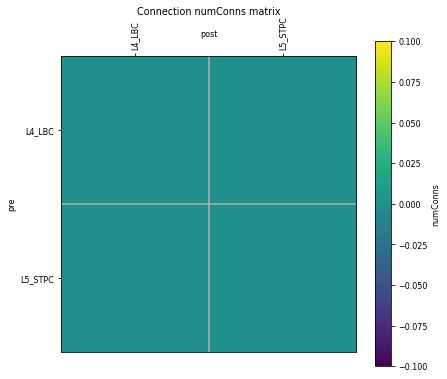

In [35]:
# features = ['numConns','convergence']
test = sim.analysis.plotConn(includePre=subPopLabels, includePost = subPopLabels, feature='numConns', figSize=(6, 6), fontSize=8, saveData=None, 
                               saveFig=True, showFig=False);

In [36]:
test[1]['connMatrix'] # total of synapses [AMPA, NMDA] or [GABAA, GABAB]

array([[0., 0.],
       [0., 0.]])

In [37]:
###### connNumber = connData['connNumber']
synperconnNumber = connData['synperconnNumber']

i=0
for pre in subPopLabels:
    j=0
    for post in subPopLabels:
        connBBP = float(connNumber[pre][post])
        if connBBP>0:
            synperconn = int(synperconnNumber[pre][post]+0.5)
            connNetPyNE = test[1]['connMatrix'][i][j]/(1*synperconn)
#             if pre in Epops and post not in Epops:
            if connNetPyNE < 1000000000000000:
                print('\t%s->%s  \t - \t  BBP = %5.1f   \t    NetPyNE = %5.1f  \t   Error = %5.1f' % (pre,post,connBBP,connNetPyNE,100*(connNetPyNE-connBBP)/connBBP),'%')

        j+=1
    i+=1

	L4_LBC->L4_LBC  	 - 	  BBP = 209.1   	    NetPyNE =   0.0  	   Error = -100.0 %
	L4_LBC->L5_STPC  	 - 	  BBP = 538.6   	    NetPyNE =   0.0  	   Error = -100.0 %
	L5_STPC->L4_LBC  	 - 	  BBP = 126.9   	    NetPyNE =   0.0  	   Error = -100.0 %
	L5_STPC->L5_STPC  	 - 	  BBP = 2127.6   	    NetPyNE =   0.0  	   Error = -100.0 %


Plotting 2D representation of network cell locations and connections...


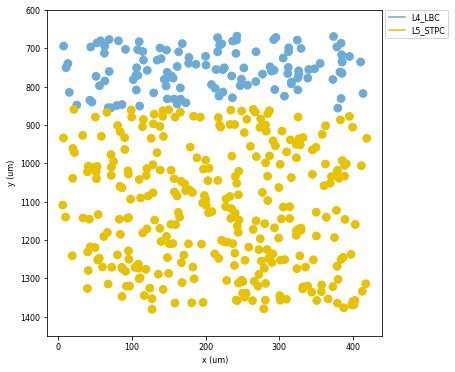

In [38]:
sim.analysis.plot2Dnet(include=subPopLabels,view='xy', showConns=False, 
                               popColors=None, tagsFile=None, figSize=(6, 6), fontSize=8, saveData=None, 
                               saveFig=True, showFig=True, lineWidth=0.1);

Plotting 2D representation of network cell locations and connections...


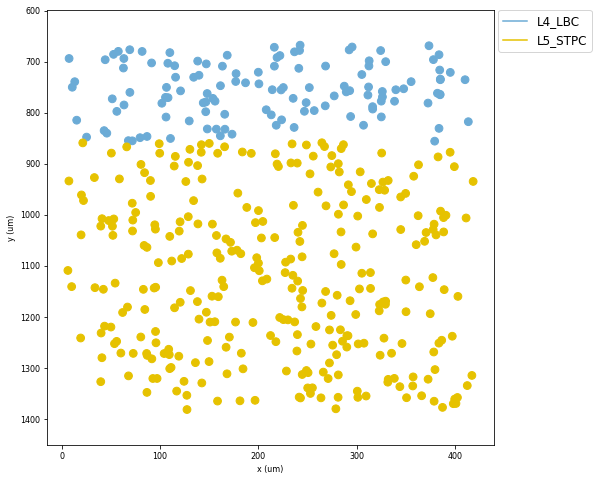

Plotting 2D representation of network cell locations and connections...


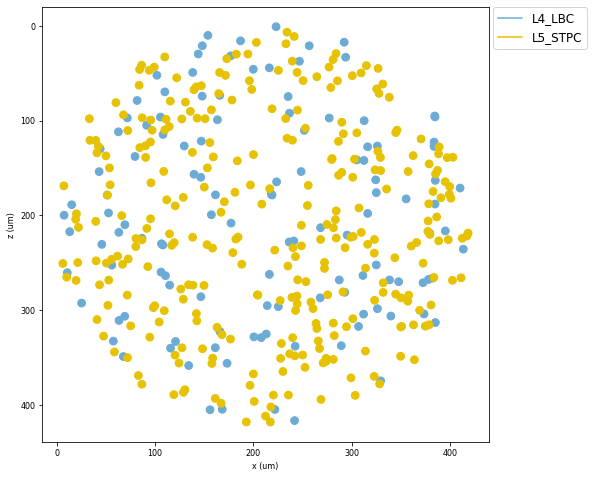

In [39]:
sim.analysis.plot2Dnet(include=subPopLabels,view='xy', showConns=False, 
                               popColors=None, tagsFile=None, figSize=(8, 8), fontSize=12, saveData=None, 
                               saveFig=None, showFig=True, lineWidth=0.1);
sim.analysis.plot2Dnet(include=subPopLabels,view='xz', showConns=False, 
                               popColors=None, tagsFile=None, figSize=(8, 8), fontSize=12, saveData=None, 
                               saveFig=None, showFig=True, lineWidth=0.1);

## Raster and traces

In [40]:
sim.analysis.plotRaster(include=subPopLabels, timeRange=[0,cfg.duration], orderBy='y', orderInverse=True, labels='legend', popRates=True, lw=5, marker='.', markerSize=24, figSize=(12, 6), fontSize=20, dpi=500, saveFig=True, showFig=False);

Plotting raster...
No spikes available to plot raster


In [41]:
for metype in cfg.cellParamLabels:
    if cfg.popLabel[metype] in subPopLabels:
        print(metype,cfg.cellNumber[metype],cfg.popLabel[metype],cfg.popNumber[cfg.popLabel[metype]])     

L4_LBC_cACint209 22 L4_LBC 122
L4_LBC_cNAC187 14 L4_LBC 122
L4_LBC_cSTUT189 31 L4_LBC 122
L4_LBC_dNAC222 46 L4_LBC 122
L4_LBC_dSTUT214 9 L4_LBC 122
L5_STPC_cADpyr232 302 L5_STPC 302


In [42]:
traces = [(mtype, [i for i in range(0,cfg.popNumber[mtype],int(cfg.popNumber[mtype]/4.5))]) for mtype in subPopLabels]
traces

[('L4_LBC', [0, 27, 54, 81, 108]), ('L5_STPC', [0, 67, 134, 201, 268])]

In [43]:
sim.analysis.plotTraces(include=traces, timeRange=[0,cfg.duration], overlay=False, oneFigPer='trace', ylim=[-90,50], subtitles= False, axis=False, scaleBarLoc=1, figSize=(12, 8), fontSize=12, saveFig=True);

Plotting recorded cell traces ... trace


<Figure size 864x576 with 0 Axes>

In [44]:
subPopLabels

['L4_LBC', 'L5_STPC']

Plotting recorded cell traces ... trace


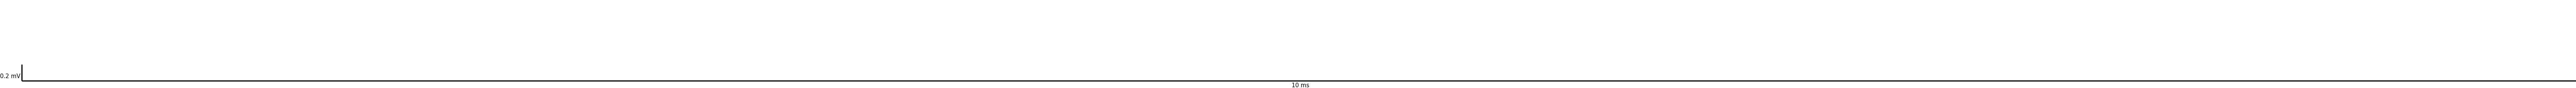

Plotting recorded cell traces ... trace


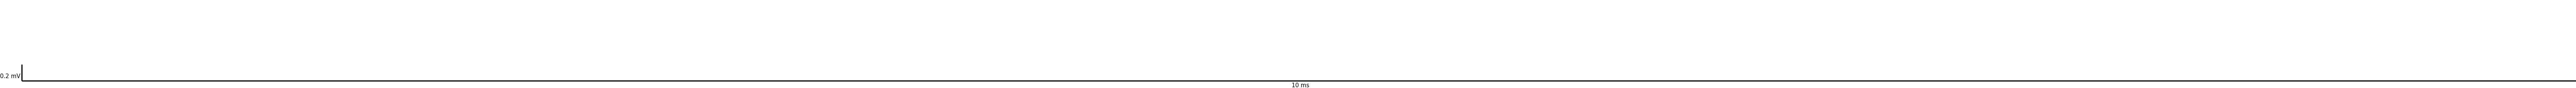

In [45]:
for pops in subPopLabels:
    sim.analysis.plotTraces(include=[pops], timeRange=[0,cfg.duration], overlay=True, oneFigPer='trace', ylim=[-80,50], axis=False, scaleBarLoc=3, figSize=(12, 4), fontSize=15, saveFig='../info/test/'+cfg.simLabel+'/'+cfg.simLabel +'_'+pops+ '_Vt.png');

In [46]:
for i in range(11):
    print(i,np.size(sim.net.cells[i].secLists['all']))

0 65
1 65
2 65
3 65
4 65
5 108
6 108
7 108
8 108
9 75
10 75


In [47]:
netParams.cellParams[cellMe]['secs']['soma']['mechs']['CaDynamics_E2']['decay']

210.485284

In [48]:
## S1 cell property rules 
number = 0    
for cellName in cfg.S1cells:   
    print(cellName,cellsID[cellName])
    for i in range(cfg.cellNumber[cellName]):
        print(number,cfg.cellNumber[cellName],list(sim.net.cells[number].secLists.keys())[-1])
        number += 1    

L4_LBC_cACint209 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
0 22 L4_LBC_cACint209_1
1 22 L4_LBC_cACint209_1
2 22 L4_LBC_cACint209_1
3 22 L4_LBC_cACint209_1
4 22 L4_LBC_cACint209_1
5 22 L4_LBC_cACint209_2
6 22 L4_LBC_cACint209_2
7 22 L4_LBC_cACint209_2
8 22 L4_LBC_cACint209_2
9 22 L4_LBC_cACint209_3
10 22 L4_LBC_cACint209_3
11 22 L4_LBC_cACint209_3
12 22 L4_LBC_cACint209_3
13 22 L4_LBC_cACint209_3
14 22 L4_LBC_cACint209_4
15 22 L4_LBC_cACint209_4
16 22 L4_LBC_cACint209_4
17 22 L4_LBC_cACint209_4
18 22 L4_LBC_cACint209_5
19 22 L4_LBC_cACint209_5
20 22 L4_LBC_cACint209_5
21 22 L4_LBC_cACint209_5
L4_LBC_cNAC187 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
22 14 L4_LBC_cNAC187_1
23 14 L4_LBC_cNAC187_1
24 14 L4_LBC_cNAC187_1
25 14 L4_LBC_cNAC187_2
26 14 L4_LBC_cNAC187_2
27 14 L4_LBC_cNAC187_2
28 14 L4_LBC_cNAC187_3
29 14 L4_LBC_cNAC187_3
30 14 L4_LBC_cNAC187_3
31 14 L4_LBC_cNAC187_4
32 14 L4_LBC_cNAC187_4
33 14 L4_LBC_cNAC187_4
34 14 L4_LBC_cNAC187_5
35 

In [49]:
list(netParams.cellParams[cellMe]['secLists'].keys())[-1],list(sim.net.cells[-1].secLists.keys())[-1]

('L5_STPC_cADpyr232_5', 'L5_STPC_cADpyr232_5')

In [50]:
np.size(sim.net.cells[i].secLists['all'])
np.size(netParams.cellParams[cellMe]['secLists']['all'])

135

In [51]:
sim.net.cells[-1].secs['soma']['geom']['L']

19.219018718497953

In [52]:
netParams.cellParams[cellMe]['secs']['soma']['geom']['L']

19.219018718497953